In [1]:
import numpy as np
from scipy.stats import norm

def retrodesign(A, s):
    """
    Calcula poder, erro tipo S e erro tipo M em Python
    Parâmetros:
    A - tamanho do efeito verdadeiro
    s - erro padrão da estimativa
    Retorna:
    dicionário com power, typeS, typeM
    """
    alpha = 0.05  # nível de significância padrão
    z = norm.ppf(1 - alpha/2)  # valor crítico z
    
    # Poder estatístico
    power = 1 - norm.cdf(z - A/s) + norm.cdf(-z - A/s)
    
    # Erro Tipo S (probabilidade de sinal errado quando significativo)
    typeS = norm.cdf(-z - A/s) / (norm.cdf(-z - A/s) + 1 - norm.cdf(z - A/s))
    
    # Erro Tipo M (expectativa de razão de magnitudes)
    # Precisamos calcular numericamente
    if A == 0:
        typeM = np.inf
    else:
        # Simulação para estimar typeM
        n_sim = 100000
        estimated_effects = np.random.normal(A, s, n_sim)
        significant = np.abs(estimated_effects) > z * s
        if np.any(significant):
            typeM = np.mean(np.abs(estimated_effects[significant])) / abs(A)
        else:
            typeM = np.inf
    
    return {
        'power': power,
        'typeS': typeS,
        'typeM': typeM
    }

In [2]:
resultados = retrodesign(0.5, 0.2)
print(f"Poder estatístico: {resultados['power']:.3f}")
print(f"Erro Tipo S: {resultados['typeS']:.3f}")
print(f"Erro Tipo M: {resultados['typeM']:.3f}")

Poder estatístico: 0.705
Erro Tipo S: 0.000
Erro Tipo M: 1.195


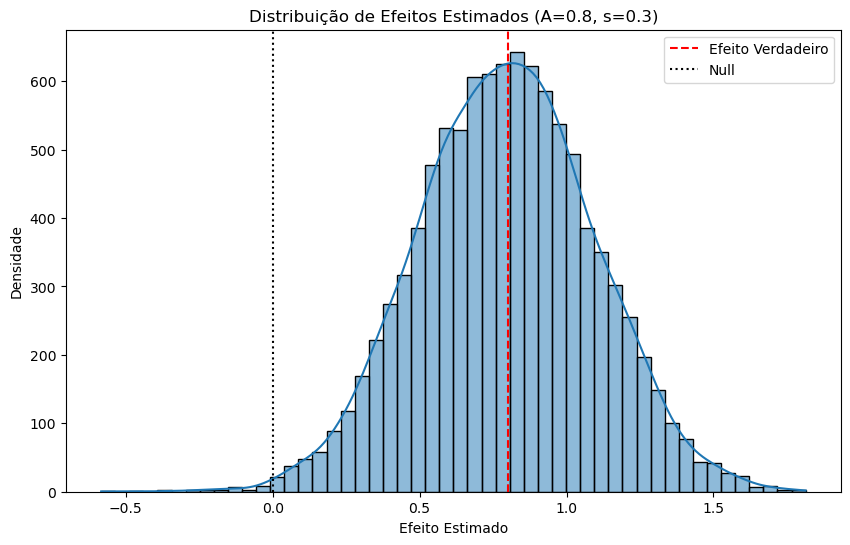

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_retrodesign(A, s):
    # Gerar distribuição de efeitos estimados
    effects = np.random.normal(A, s, 10000)
    
    # Plotar
    plt.figure(figsize=(10, 6))
    sns.histplot(effects, kde=True, bins=50)
    plt.axvline(x=A, color='r', linestyle='--', label='Efeito Verdadeiro')
    plt.axvline(x=0, color='k', linestyle=':', label='Null')
    plt.title(f'Distribuição de Efeitos Estimados (A={A}, s={s})')
    plt.xlabel('Efeito Estimado')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

plot_retrodesign(0.8, 0.3)

# **Erros Tipo M e Tipo S em Experimentos Científicos**

Os **erros Tipo M (Magnitude)** e **Tipo S (Sinal)** são conceitos estatísticos importantes para avaliar a confiabilidade de resultados em experimentos, especialmente quando o **poder estatístico** é baixo ou quando há risco de **falsos positivos/não significativos**. Eles complementam os tradicionais **erros Tipo I (falso positivo) e Tipo II (falso negativo)**.

---

## **1. Erro Tipo S (Sinal)**
### **O que é?**
- O **erro Tipo S** ocorre quando um estudo detecta um efeito estatisticamente significativo, mas com o **sinal oposto** ao verdadeiro efeito.
- Ou seja, o estudo conclui que o efeito é **positivo** quando na realidade é **negativo**, ou vice-versa.

### **Quando acontece?**
- Em estudos com **baixo poder estatístico** (poucas amostras, efeitos pequenos).
- Quando o **erro padrão é alto** (muita variabilidade nos dados).
- Quando o **efeito verdadeiro está próximo de zero**.

### **Exemplo:**
- Suponha que um remédio **realmente reduz** a pressão arterial em **1 mmHg**, mas devido a um erro Tipo S, o estudo encontra um aumento de **0.5 mmHg** com **p < 0.05** (significativo, mas na direção errada!).

### **Como evitar?**
- Aumentar o **tamanho da amostra** (↑ poder estatístico).
- Usar **intervalos de confiança** para verificar a direção do efeito.
- Evitar interpretar resultados **borderline significativos** (p ≈ 0.05) como conclusivos.

---

## **2. Erro Tipo M (Magnitude)**
### **O que é?**
- O **erro Tipo M** ocorre quando um estudo **superestima** a magnitude do efeito real.
- Mesmo que o sinal esteja correto, o tamanho do efeito relatado pode ser **muito maior** do que o verdadeiro.

### **Quando acontece?**
- Em estudos com **poder estatístico baixo** (maior chance de flutuações aleatórias).
- Quando há **viés de publicação** (só resultados grandes são publicados).
- Quando o **efeito real é pequeno**, mas o estudo relata um efeito exagerado.

### **Exemplo:**
- Um estudo sobre um novo remédio encontra um efeito de **redução de 5 mmHg** na pressão (p < 0.05), mas o **efeito real é apenas 1 mmHg**.
- Isso significa que o estudo **superestimou o efeito em 5 vezes** (Erro Tipo M = 5).

### **Como evitar?**
- Usar **metanálises** para combinar múltiplos estudos.
- Reportar **intervalos de confiança**, não apenas p-valores.
- Considerar **estudos de replicação** para confirmar magnitudes.

---

## **3. Comparação com Erros Tipo I e Tipo II**
| Conceito | Definição | Exemplo |
|----------|-----------|---------|
| **Erro Tipo I (α)** | Falso positivo (rejeitar H₀ quando ela é verdadeira) | Concluir que um remédio funciona quando não funciona. |
| **Erro Tipo II (β)** | Falso negativo (não rejeitar H₀ quando ela é falsa) | Falhar em detectar um remédio que realmente funciona. |
| **Erro Tipo S** | Sinal errado (efeito significativo na direção oposta) | Concluir que um remédio aumenta a pressão quando na verdade diminui. |
| **Erro Tipo M** | Magnitude exagerada (superestimação do efeito) | Estimar um efeito 5x maior do que o real. |

---

## **4. Por que esses erros importam?**
- **Ciência irreprodutível**: Muitos estudos com baixo poder produzem resultados enganosos (ex.: psicologia, medicina).
- **Tomada de decisão errada**: Políticas públicas ou tratamentos médicos podem ser baseados em conclusões distorcidas.
- **Viés de publicação**: Estudos com efeitos grandes (mas errados) são mais publicados do que estudos nulos ou pequenos.

---

## **5. Como calcular esses erros?**
### **No R:**
```r
library(retrodesign)
retrodesign(A = efeito_real, s = erro_padrão)
```
### **Em Python:**
```python
def retrodesign(A, s):
    # (Ver código anterior)
    return {"power": poder, "typeS": erro_S, "typeM": erro_M}
```

### **Interpretação:**
- Se **typeS > 5%**, risco alto de conclusão invertida.
- Se **typeM > 2**, o efeito pode estar superestimado em mais de 2x.

---

## **Conclusão**
Os **erros Tipo S e Tipo M** ajudam a entender melhor os riscos em experimentos científicos, especialmente em estudos com **poder baixo** ou **efeitos pequenos**. Eles mostram que, além de verificar **significância estatística (p-valor)**, é crucial avaliar:
- **Direção do efeito (Tipo S)**
- **Magnitude real (Tipo M)**

Isso evita conclusões enganosas e melhora a **robustez da pesquisa científica**.

# Referências:

https://medium.com/data-science/false-discovery-rate-type-m-and-type-s-errors-in-an-underpowered-a-b-test-d323df5271fa

[1] Andrew Gelman e John Carlin (2014). Além dos cálculos de potência: avaliando erros do tipo S (sinal) e do tipo M (magnitude). Perspectivas sobre a ciência psicológica. Vol. 9(6) 641–651.
( DOI: 10.1177/1745691614551642 )

[2] David Colquhoun (2014). Uma investigação sobre a taxa de falsas descobertas e a interpretação errônea dos valores de p. R. Soc. open sci. 1: 140216. http://dx.doi.org/10.1098/rsos.140216

[3] Chris Stucchio (2013). Analisando taxas de conversão com a Regra de Bayes (tutorial de estatística bayesiana). https://www.chrisstucchio.com/blog/2013/bayesian_analysis_conversion_rates.html

[4] Peter Borden (2014). Como a Optimizely (quase) me fez ser demitido. https://blog.sumall.com/journal/optimizely-got-me-fired.html

[5] Sellke T, Bayarri MJ, Berger JO. (2001). Calibração de valores de p para testar hipóteses nulas precisas. Am. Stat. 55, 62–71. ( DOI:10.1198/000313001300339950 )

[6] Berger JO, Sellke T. (1987). Testando uma hipótese de ponto nulo: a irreconciliabilidade dos valores de p e evidências. J. Am. Stat. Assoc. 82,
112–122. ( DOI:10.1080/01621459.1987.10478397 )